In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Replace 'Target' with 'Outcome' in the drop method
scaler.fit(df.drop('Outcome', axis=1))
scaled_features = scaler.transform(df.drop('Outcome', axis=1))

df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    df['Outcome'], # Changed 'Taregt' to 'Outcome'
                                                    test_size=0.30)

# Remember that we are trying to come up
# with a model to predict whether
# someone will Target or not.
# We'll start with k = 1.

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Predictions and Evaluations
# Let's evaluate our KNN model!
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[111  30]
 [ 48  42]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       141
           1       0.58      0.47      0.52        90

    accuracy                           0.66       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.65      0.66      0.65       231



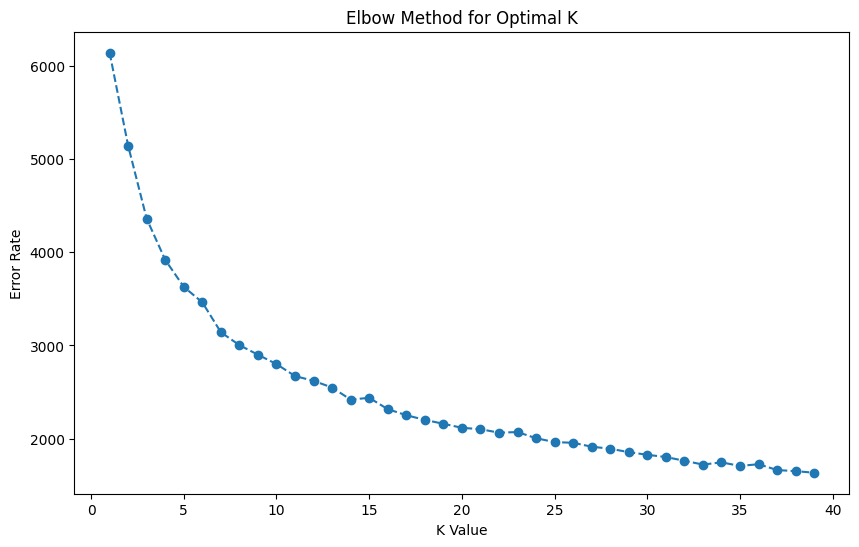

In [ ]:
# Elbow Method
# Let’s go ahead and use the elbow method to pick a good K Value.

from sklearn.cluster import KMeans

error_rate = []

for i in range(1,40):

    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_feat)
    error_rate.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker='o', linestyle='--')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal K')
plt.show()

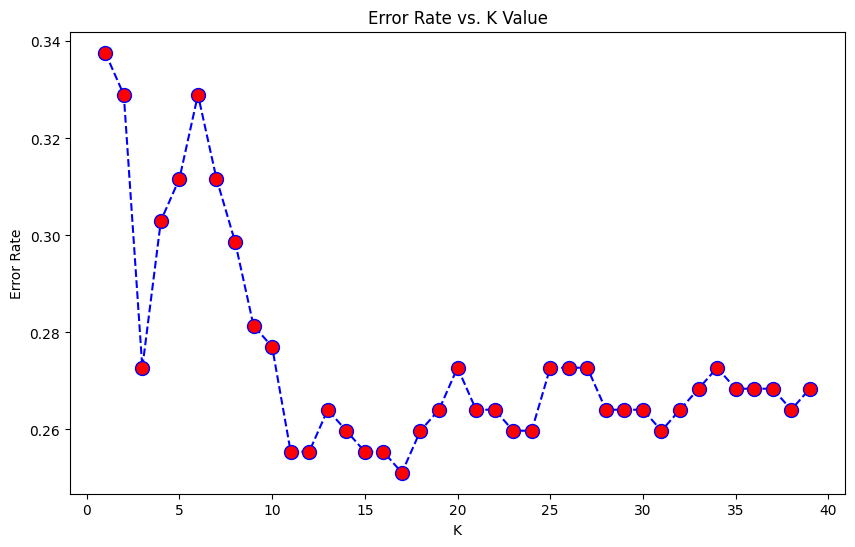

In [ ]:
error_rate = []

# Will take some time
for i in range(1, 40):

	knn = KNeighborsClassifier(n_neighbors=i)
	knn.fit(X_train, y_train)
	pred_i = knn.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
		linestyle='dashed', marker='o',
		markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [ ]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 1')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))


WITH K = 1
Confusion Matrix
[[111  30]
 [ 48  42]]
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       141
           1       0.58      0.47      0.52        90

    accuracy                           0.66       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.65      0.66      0.65       231



In [ ]:
# NOW WITH K = 10
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 10')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))


WITH K = 10
Confusion Matrix
[[129  12]
 [ 52  38]]
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       141
           1       0.76      0.42      0.54        90

    accuracy                           0.72       231
   macro avg       0.74      0.67      0.67       231
weighted avg       0.73      0.72      0.70       231

